불법 주정차 데이터셋 -> 1클래스로 만드는 과정에서 동일한 이미지에 대해 승용차/SUV를 따로 적용 
이부분을 보완하기 위한 작업

## import library

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

## load full dataset directory

In [18]:
root_dir = 'C:Users\\chobh\\Desktop\\bigProject\\Data\\138.종합 민원 이미지 AI데이터\\01.데이터'

# train_label = '1.Training/라벨링데이터/TL3/불법주정차'
train_img = '1.Training\\원천데이터\\TS3\\불법주정차'
# val_label = '2.Validation/라벨링데이터/VL3/불법주정차'
val_img = '2.Validation\\원천데이터\\VS3\\불법주정차'


day_suv = '불법주정차SUV(낮)'
night_suv = '불법주정차SUV(밤)'
day_car = '불법주정차승용차(낮)'
night_car = '불법주정차승용차(밤)'

# 경로 지정
train_day_suv_dir = os.path.join(root_dir, train_img, day_suv)
train_day_suv_dir == "C:\\Users\\chobh\\Desktop\\bigProject\\Data\\138.종합 민원 이미지 AI데이터\\01.데이터\\1.Training\\원천데이터\\TS3\\불법주정차\\불법주정차SUV(낮)"

False

In [52]:
print(all([x[:3] == '33_' for x in os.listdir(ds_dir)]))
print(all([x[:3] == '34_' for x in os.listdir(ns_dir)]))
print(all([x[:3] == '35_' for x in os.listdir(dc_dir)]))
print(all([x[:3] == '36_' for x in os.listdir(nc_dir)]))

True
True
True
True


In [44]:
ds_dir = r"C:\Users\chobh\Desktop\bigProject\Data\138.종합 민원 이미지 AI데이터\01.데이터\1.Training\원천데이터\TS3\불법주정차\불법주정차SUV(낮)"
dc_dir = r"C:\Users\chobh\Desktop\bigProject\Data\138.종합 민원 이미지 AI데이터\01.데이터\1.Training\원천데이터\TS3\불법주정차\불법주정차승용차(낮)"

In [45]:
print(len(os.listdir(ds_dir)))
print(len(os.listdir(dc_dir)))

40000
40000


In [69]:
# 클래스 제외한 이미지 이름 확인
ds_list = set([x[3:] for x in os.listdir(ds_dir)])
# ns_list = set([x[3:] for x in os.listdir(ns_dir)])
dc_list = set([x[3:] for x in os.listdir(dc_dir)])
# nc_list = set([x[3:] for x in os.listdir(nc_dir)])

day_common_list = list(ds_list.intersection(dc_list))
day_suv_list = list(ds_list.difference(dc_list))
day_car_list = list(dc_list.difference(ds_list))
# night_list = list(ns_list.intersect(nc_list))

# 중복되는 이미지 개수 확인
print(len(day_common_list)) # 21075
print(len(day_suv_list))
print(len(day_common_list) + len(day_suv_list) + len(day_car_list))
# print(len(night_list)) # 20552

21075
18925
58925


In [48]:
ds_dir = r"C:\Users\chobh\Desktop\bigProject\Data\138.종합 민원 이미지 AI데이터\01.데이터\1.Training\원천데이터\TS3\불법주정차\불법주정차SUV(낮)"
nc_dir = r"C:\Users\chobh\Desktop\bigProject\Data\138.종합 민원 이미지 AI데이터\01.데이터\1.Training\원천데이터\TS3\불법주정차\불법주정차SUV(밤)"

print(len(os.listdir(ds_dir)))
print(len(os.listdir(nc_dir)))

40000
40000


In [49]:
# 클래스 제외한 이미지 이름 확인
ds_list = set([x[3:] for x in os.listdir(ds_dir)])
# ns_list = set([x[3:] for x in os.listdir(ns_dir)])
dc_list = set([x[3:] for x in os.listdir(nc_dir)])
# nc_list = set([x[3:] for x in os.listdir(nc_dir)])

day_list = list(ds_list.intersection(dc_list))
# night_list = list(ns_list.intersect(nc_list))

# 중복되는 이미지 개수 확인
print(len(day_list)) # 21075
print(len(os.listdir(ds_dir)) - len(day_list))
print(len(os.listdir(ds_dir)) + len(os.listdir(ds_dir)) - len(day_list))
# print(len(night_list)) # 20552

0
40000
80000


## 처리 완료 확인

In [59]:
def show_yolo_label_on_image(image_path, label_path, box_color=(0, 0, 255), thickness=2):
    """
    YOLO 포맷의 txt 파일을 사용하여 bounding box를 시각화합니다.
    - image_path: 이미지 파일 경로
    - label_path: YOLO 형식의 .txt 라벨 경로
    """
    # 이미지 로딩 (BGR → RGB 변환)
    img = cv2.imread(image_path)
    if img is None:
        print(f"[!] 이미지 파일을 찾을 수 없습니다: {image_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_viz = img_rgb.copy()
    img_h, img_w = img_viz.shape[:2]

    # YOLO 라벨 파일 확인
    if not os.path.exists(label_path):
        print(f"[!] 라벨 파일을 찾을 수 없습니다: {label_path}")
        return

    with open(label_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, parts)
        
        # 좌표 복원 (정규화 → 절대 픽셀 좌표)
        x1 = int((x_center - width / 2) * img_w)
        y1 = int((y_center - height / 2) * img_h)
        x2 = int((x_center + width / 2) * img_w)
        y2 = int((y_center + height / 2) * img_h)
        
        # 시각화
        cv2.rectangle(img_viz, (x1, y1), (x2, y2), box_color, thickness)
        cv2.putText(img_viz, f"Illegal Parking", (x1, max(y1 - 10, 0)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, box_color, 2)

    # 결과 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_viz)
    plt.title("YOLO Annotation")
    plt.axis("off")
    plt.show()

def show_json_label_on_image(image_path, json_path, box_color=(0,255,0), thickness=2):
    """
    원본 이미지와 json 어노테이션이 시각화된 이미지를 1행 2열로 출력합니다.
    """
    # 이미지 로딩 (BGR->RGB 변환)
    img_np = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"이미지 파일을 찾을 수 없습니다: {image_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # 원본 이미지 (복사 필요)
    img_viz = img_rgb.copy()                         # 시각화 이미지

    # json 로딩
    if not os.path.exists(json_path):
        print(f"json 파일을 찾을 수 없습니다: {json_path}")
        return
    with open(json_path, "r", encoding='utf-8') as f:
        data = json.load(f)
    
    # 이미지 해상도 정보
    meta = data.get("meta", {})
    img_w, img_h = 0, 0
    resolution = meta.get("Resolution", "")
    if 'x' in resolution:
        try:
            img_w, img_h = map(int, resolution.split('x'))
        except Exception as e:
            print("Resolution 정보 파싱 오류:", e)
    
    # 박스 정보 추출
    ann = data.get("annotations", {}).get("Bbox Annotation", {})
    boxes = ann.get("Box", [])

    for box in boxes:
        class_name = box.get('category_name', 'unknown')
        x, y, w, h = box['x'], box['y'], box['w'], box['h']
        if img_w == 0 or img_h == 0:
            img_h, img_w = img_viz.shape[:2]
        x1 = int(x)
        y1 = int(y)
        x2 = int(x + w)
        y2 = int(y + h)
        cv2.rectangle(img_viz, (x1, y1), (x2, y2), box_color, thickness)
        label = "Illegal Parking"
        cv2.putText(img_viz, label, (x1, max(y1-10,0)), cv2.FONT_HERSHEY_SIMPLEX, 0.8, box_color, 2)
    
    # 1행 2열로 원본, 시각화 모두 보여주기
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img_viz)
    plt.title('With annotation')
    plt.axis('off')
    plt.show()



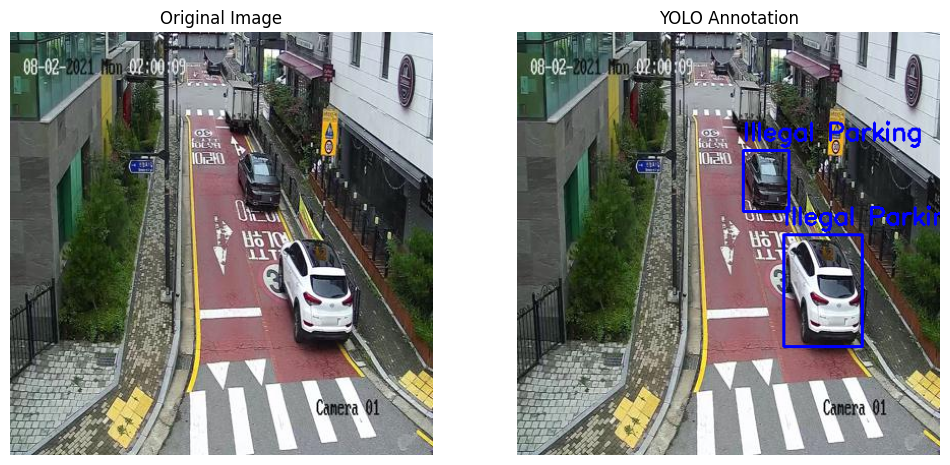

In [79]:
# 병합 버전

img = day_common_list[4].split('.')[0]
# img = day_suv_list[11].split('.')[0]
# img = day_car_list[8].split('.')[0]

img_dir = r"C:\Users\chobh\Desktop\bigProject\Data\oneclass_illegal_parking_dataset\images\train\day\{}.jpg".format(img)
label_dir = r"C:\Users\chobh\Desktop\bigProject\Data\oneclass_illegal_parking_dataset\labels\train\day\{}.txt".format(img)

show_yolo_label_on_image(img_dir, label_dir)